<a href="https://colab.research.google.com/github/Aakanshareddy/Oasis-TASK2-UNEMPLOYEMENT/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2**

# **Unemployment Analysis with Python**

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv('/content/Unemployment in India.csv')

In [5]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
# Display statistical summary
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
# Check for missing values
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [10]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [11]:
pd.DataFrame(df.iloc[:,3])

,Estimated Unemployment Rate (%)
0,3.65
1,3.05
2,3.75
3,3.32
4,5.17
...,...
749,7.55
750,6.67
751,15.63
752,15.22


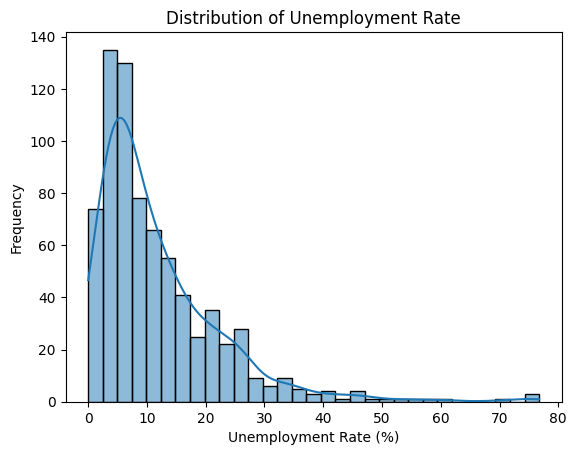

In [12]:
# Visualizing the distribution of unemployment rate
sns.histplot(df.iloc[:,3], kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-56596678e2c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='viridis')


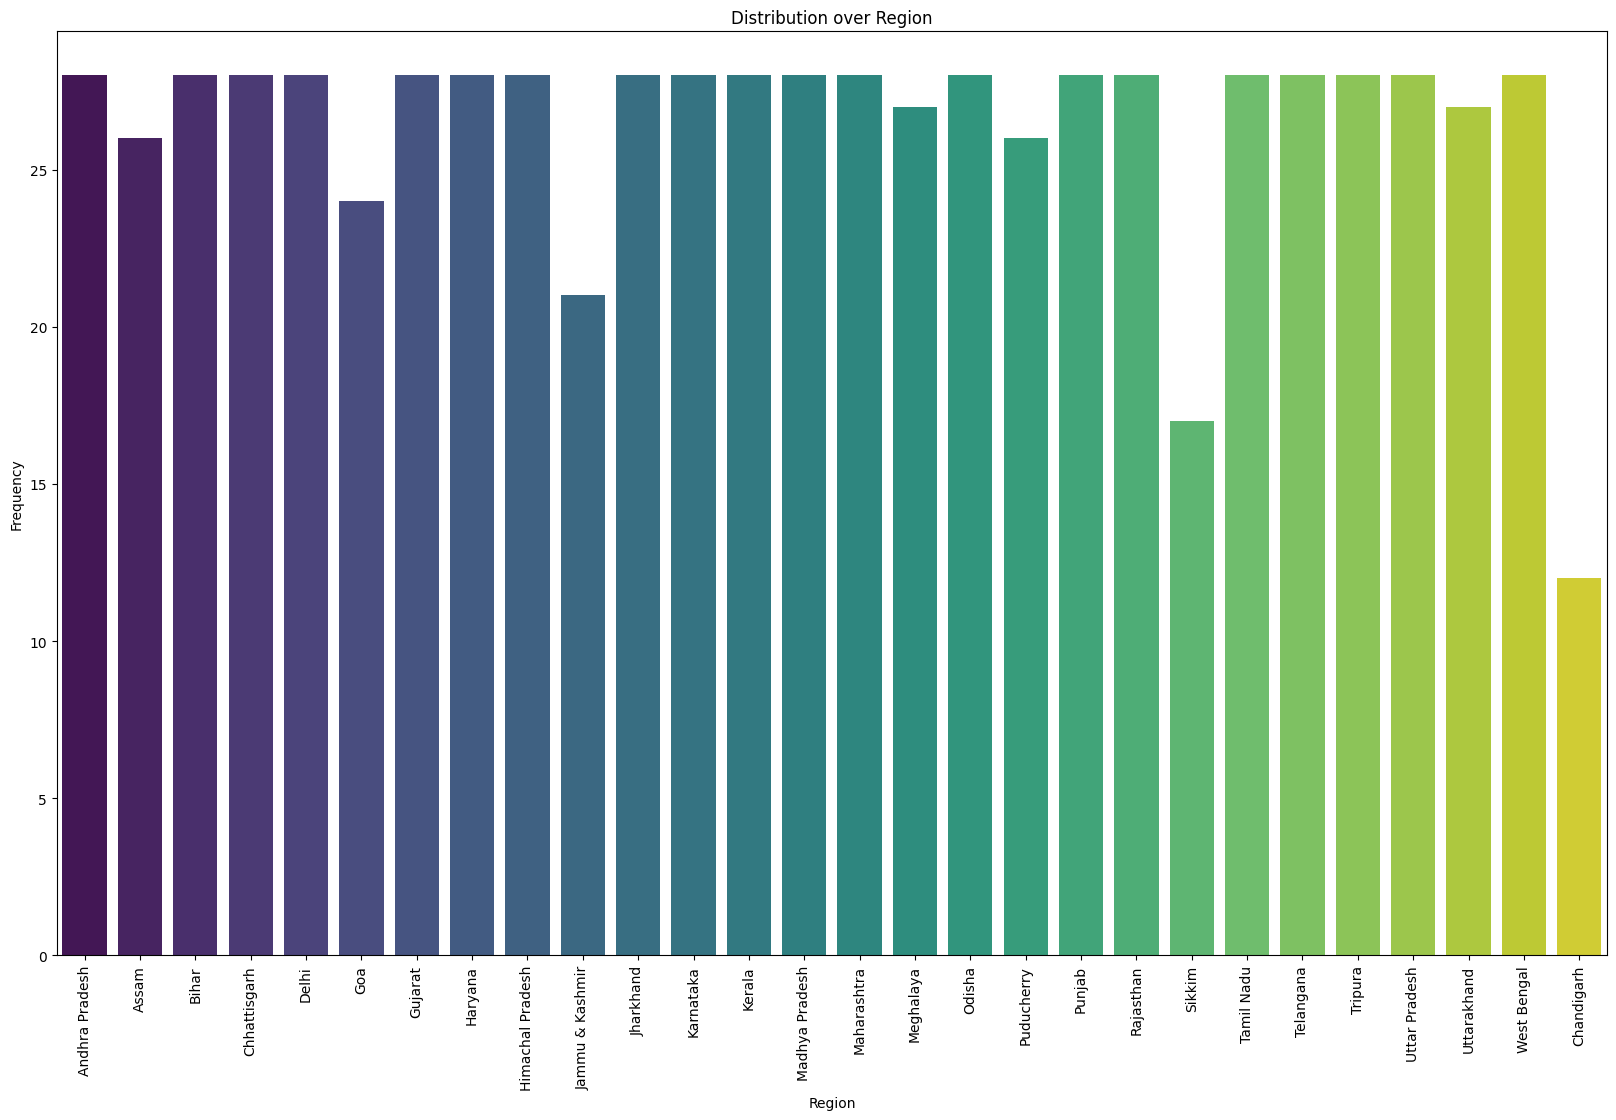

In [13]:
#Visualizing the distribution over region
plt.figure(figsize=(20, 12))
sns.countplot(x='Region', data=df, palette='viridis')
plt.title('Distribution over Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

State with the highest unemployment rate: Tripura
Highest unemployment rate: 28.350357142857142
State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 4.7988888888888885


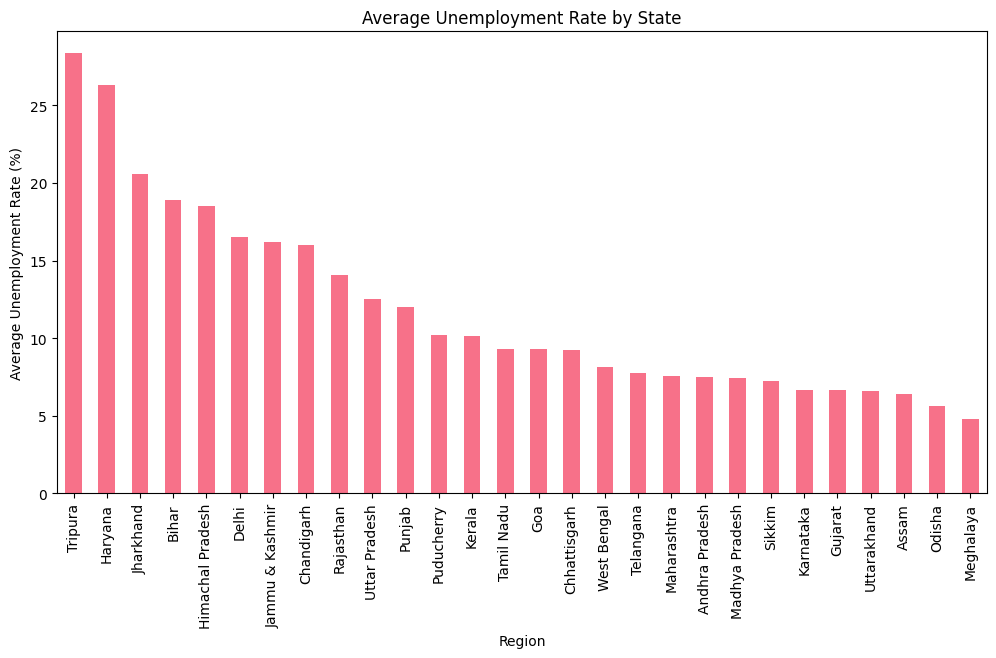

In [14]:
# Calculate the average unemployment rate by state
average_unemployment_rate = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()


print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)


sns.set_palette("husl")

plt.figure(figsize=(12, 6))
average_unemployment_rate.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

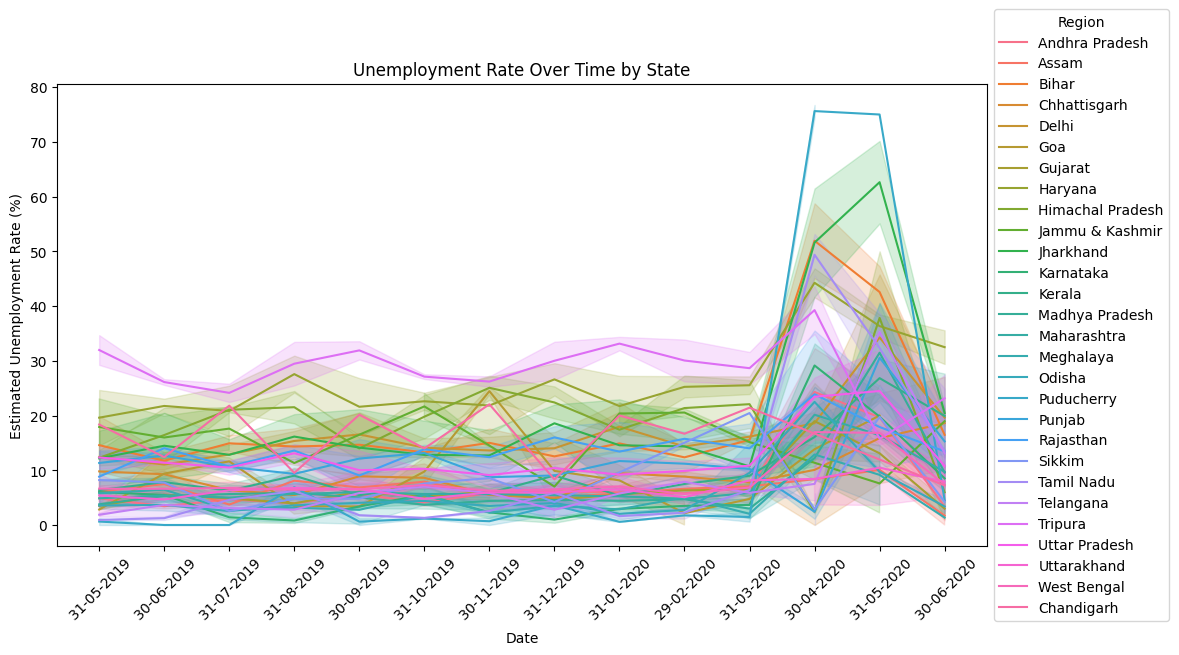

In [15]:
sns.set_palette("tab20")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title("Unemployment Rate Over Time by State")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

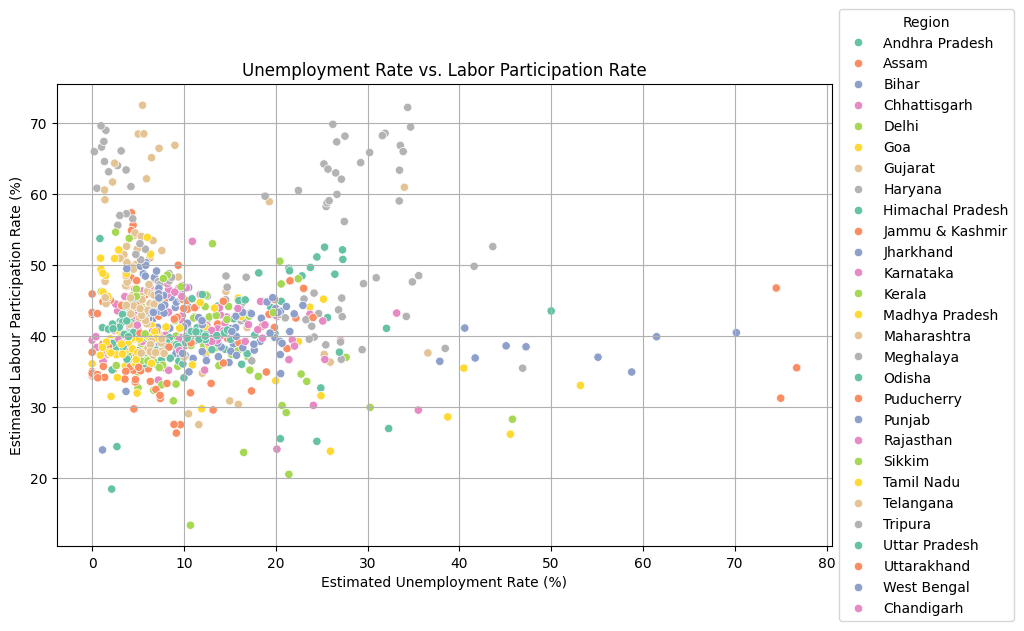

In [16]:
#Unemployment Rate vs. Labor Participation Rate
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', data=df, hue='Region', palette='Set2', legend='full')
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()